In [1]:
import pandas as pd
import numpy as np
import math
import csv
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/train.csv', encoding='big5')

In [3]:
data = data.iloc[:,3:]
# print(data)
data[data == 'NR'] = 0
# print(data)
raw_data = data.to_numpy()

In [4]:
month_data = {}
for month in range(12):
    sample = np.empty([18, 20*24])
    for day in range(20):
        sample[:, day * 24: (day + 1) * 24] = raw_data[18 *\
        (20 * month + day): 18 * (20 * month + day + 1),:]
        month_data[month] = sample

In [5]:
x = np.empty([12 * 471, 18 * 9], dtype=float)
y = np.empty([12 * 471, 1], dtype=float)

for month in range(12):
    for day in range(20):
        for hour in range(24):
            if day == 19 and hour > 14:
                continue
            x[month * 471 + day * 24 + hour, :] = month_data[month]\
            [:, day * 24 + hour: day * 24 + hour + 9].reshape(1,-1)
            y[month * 471 + day *24 + hour, 0] = month_data[month]\
            [9, day * 24 + hour + 9]

In [6]:
mean_x = np.mean(x, axis=0)
std_x = np.std(x, axis=0)

for i in range(len(x)):
    for j in range(len(x[0])):
        if std_x[j] != 0:
            x[i][j] = (x[i][j] - mean_x[j]) / std_x[j]

In [7]:
x_train_set = x[: math.floor(len(x) * 0.8), :]
y_train_set = y[: math.floor(len(y) * 0.8), :]
x_validation = x[math.floor(len(x) * 0.8):, :]
y_validation = y[math.floor(len(y) * 0.8):, :]
# print(x_train_set)
# print(y_train_set)
# print(x_validation)
# print(y_validation)
# print(len(x_train_set))
# print(len(y_train_set))
# print(len(x_validation))
# print(len(y_validation))

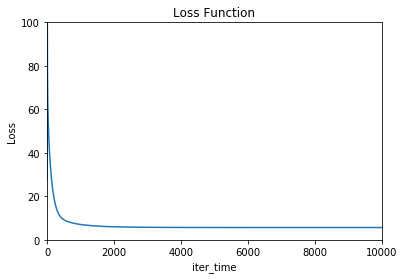

In [8]:
dim = 18 * 9 + 1
w = np.zeros([dim, 1])
x = np.concatenate((np.ones([12 * 471, 1]), x), axis=1).astype(float)

lr = 100
iter_time = 10000
adagrad = np.zeros([dim, 1])
eps = 0.0000000001

loss_set = []

for t in range(iter_time):
    loss = np.sqrt(np.sum(np.power(np.dot(x, w) - y, 2))/ 471 / 12) # choose Root Mean Square Error (rmse)
    loss_set.append(loss)
#     if(t % 100 == 0 ):
#         print(str(t) + ':' + str(loss))
    gradient = 2 * np.dot(x.transpose(), np.dot(x,w) - y)
    adagrad = adagrad + gradient ** 2
    w = w - lr * gradient / np.sqrt(adagrad + eps)
np.save('weight.npy', w)
# print(w)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlim = [0, 10000], ylim = [0, 100], title = 'Loss Function',\
      ylabel = 'Loss', xlabel = 'iter_time')
plt.plot(np.array(range(iter_time)), loss_set)
plt.savefig('Loss.svg')
plt.show()


In [9]:
w = np.load('weight.npy')
x_validation = np.concatenate((np.ones([1131, 1]), x_validation), axis=1).astype(float)
ans_y = np.dot(x_validation, w)
# print(ans_y)
loss = np.sqrt(np.sum(np.power(ans_y - y_validation, 2)) / 1131)
print(loss)

5.4245555863327555


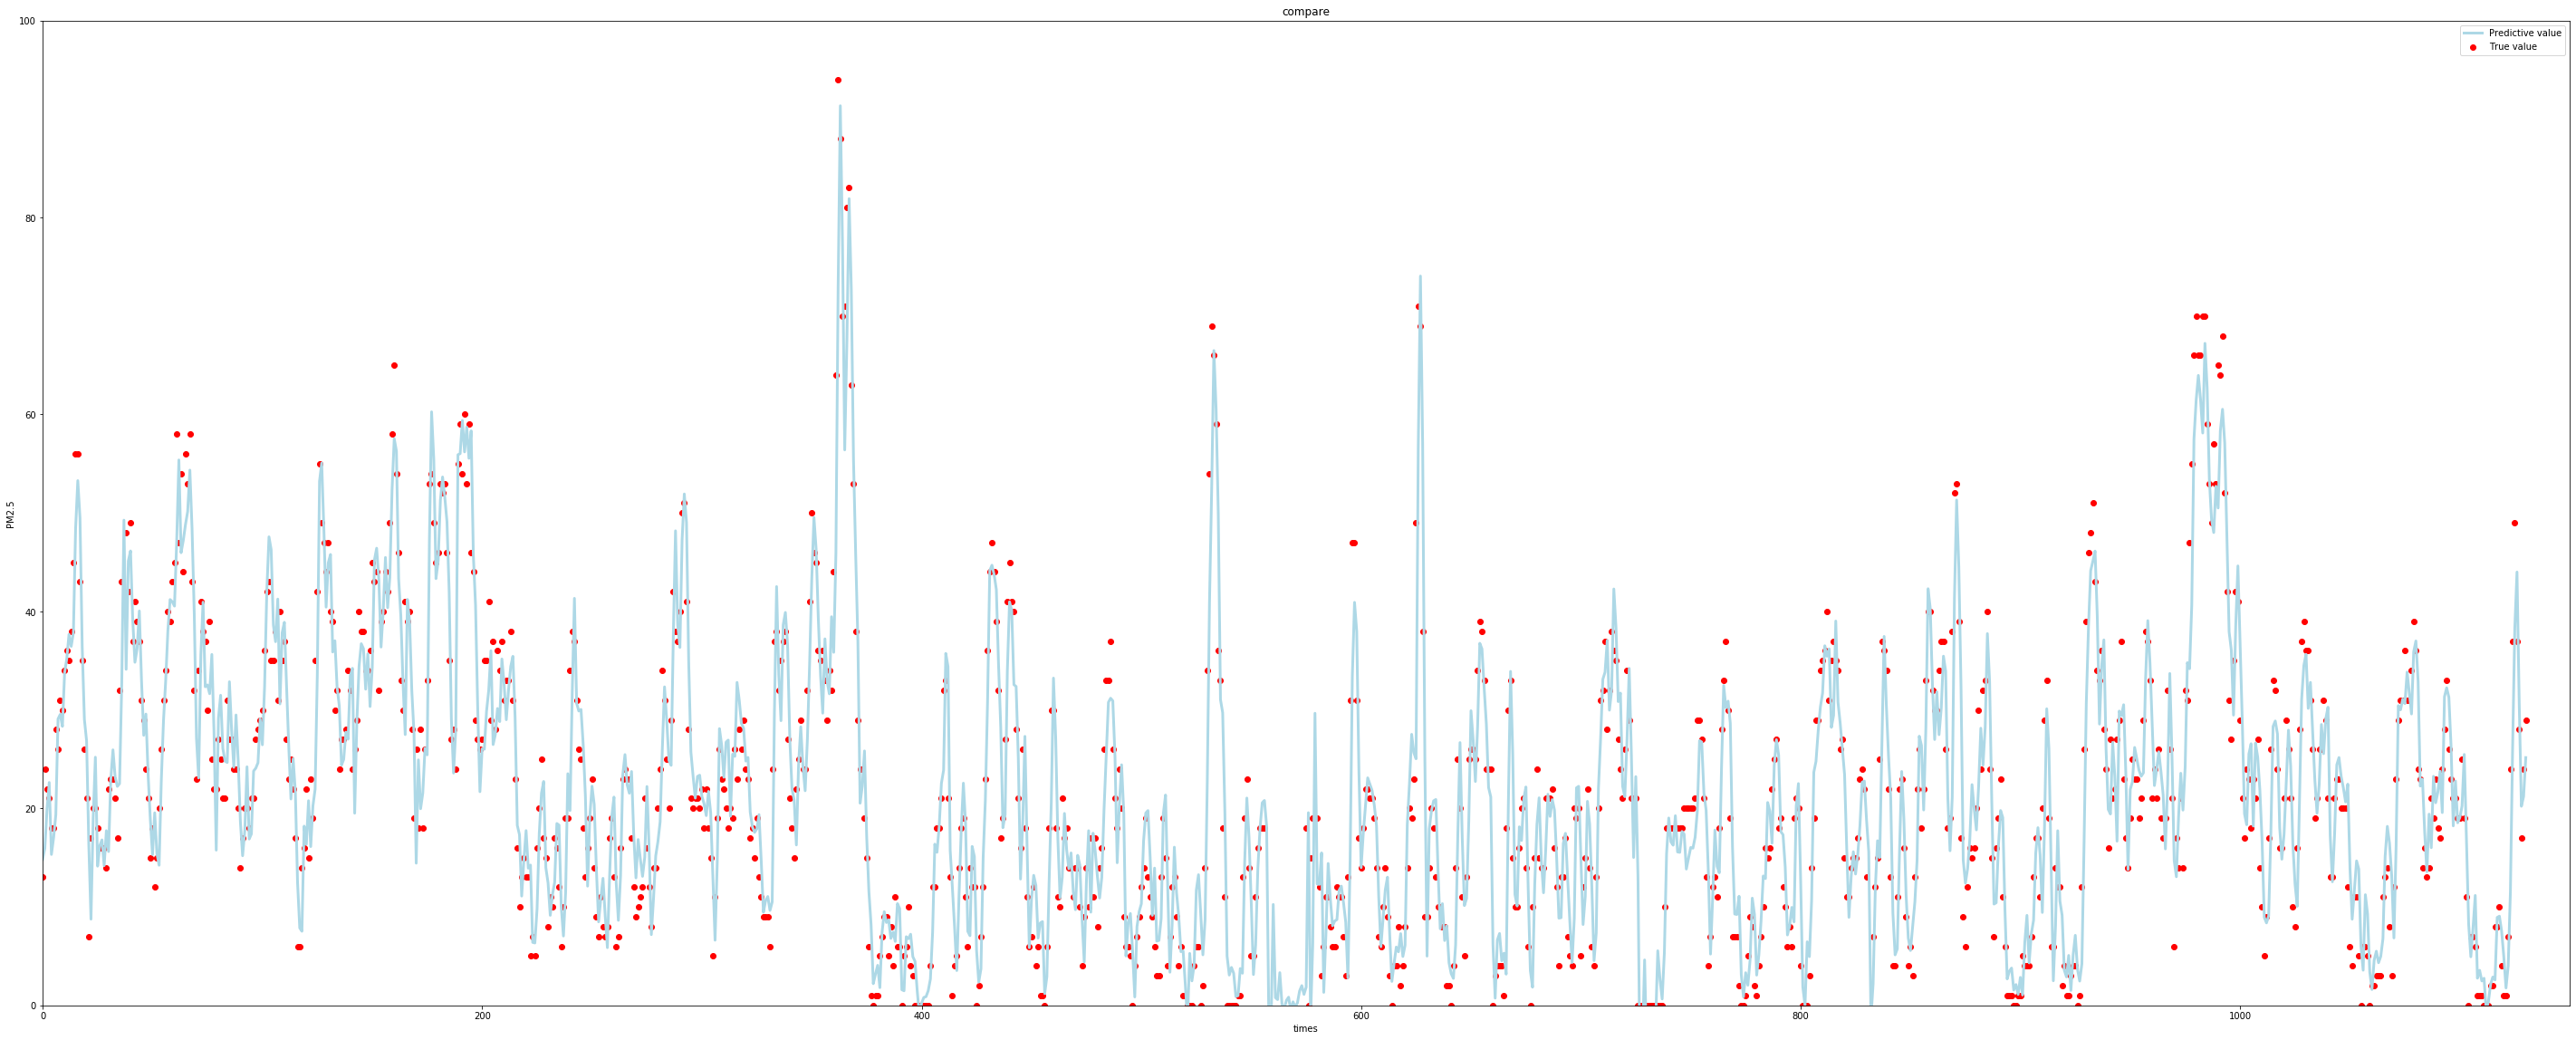

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlim = [0, 1150], ylim = [0, 100], title = 'compare',\
      ylabel = 'PM2.5', xlabel = 'times')
plt.rcParams['figure.figsize'] = (50.0, 10.0)
plt.plot(np.array(range(len(ans_y))), ans_y, color = 'lightblue',\
        linewidth = 3, label = 'Predictive value')
plt.scatter(np.array(range(len(ans_y))), y_validation, color = 'red',\
         linestyle="-", label = 'True value')
plt.legend()
plt.savefig('compare.svg')
plt.show() 


In [13]:
with open('validation_y.csv', mode='w', newline='') as file:
    csv_writer = csv.writer(file)
    header = ['id', 'value', 'validation']
#     print(header)
    csv_writer.writerow(header)
    for i in range(len(ans_y)):
        row = ['id_' + str(i), ans_y[i][0], y_validation[i][0]]
        csv_writer.writerow(row)
#         print(row)

In [14]:
testdata = pd.read_csv('./data/test.csv', header = None, encoding='big5')
# print(testdata)
test_data = testdata.iloc[:, 2:]
test_data[test_data == 'NR'] = 0
test_data = test_data.to_numpy()
# print(test_data.shape)

test_x = np.empty([240, 18*9], dtype = float)

for i in range(240):
    test_x[i, :] = test_data[18 * i: 18* (i + 1), :].reshape(1, -1)

for i in range(len(test_x)):
    for j in range(len(test_x[0])):
        if std_x[j] != 0:
            test_x[i][j] = (test_x[i][j] - mean_x[j]) / std_x[j]
test_x = np.concatenate((np.ones([240, 1]), test_x), \
        axis = 1).astype(float)
# print(test_x)

/Users/yaa/.yaprograms/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/yaa/.yaprograms/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2986: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


In [15]:
w = np.load('weight.npy')
ans_y = np.dot(test_x, w)
# print(ans_y)

In [16]:
with open('submit.csv', mode='w', newline='') as submit_file:
    csv_writer = csv.writer(submit_file)
    header = ['id', 'value']
#     print(header)
    csv_writer.writerow(header)
    for i in range(240):
        row = ['id_' + str(i), ans_y[i][0]]
        csv_writer.writerow(row)
#         print(row)